In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from matplotlib import style

from scipy.stats import kurtosis, skew
import scipy.stats as stats

from math import sqrt

In [2]:
df = pd.read_csv("cleaned_data_kc_house_data")

remove target variable<br>
also took out id since its only use is as an index

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21082 entries, 0 to 21081
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null object
price            21082 non-null int64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null int64
view             21082 non-null int64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null int64
yr_built         21082 non-null int64
yr_renovated     21082 non-null int64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.4+ MB


In [5]:
predictors = df.drop(['id', 'price'], axis = 1 )

In [6]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21082 entries, 0 to 21081
Data columns (total 19 columns):
date             21082 non-null object
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null int64
view             21082 non-null int64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null int64
yr_built         21082 non-null int64
yr_renovated     21082 non-null int64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: float64(4), int64(14), object(1)
memory usage: 3.1+ MB


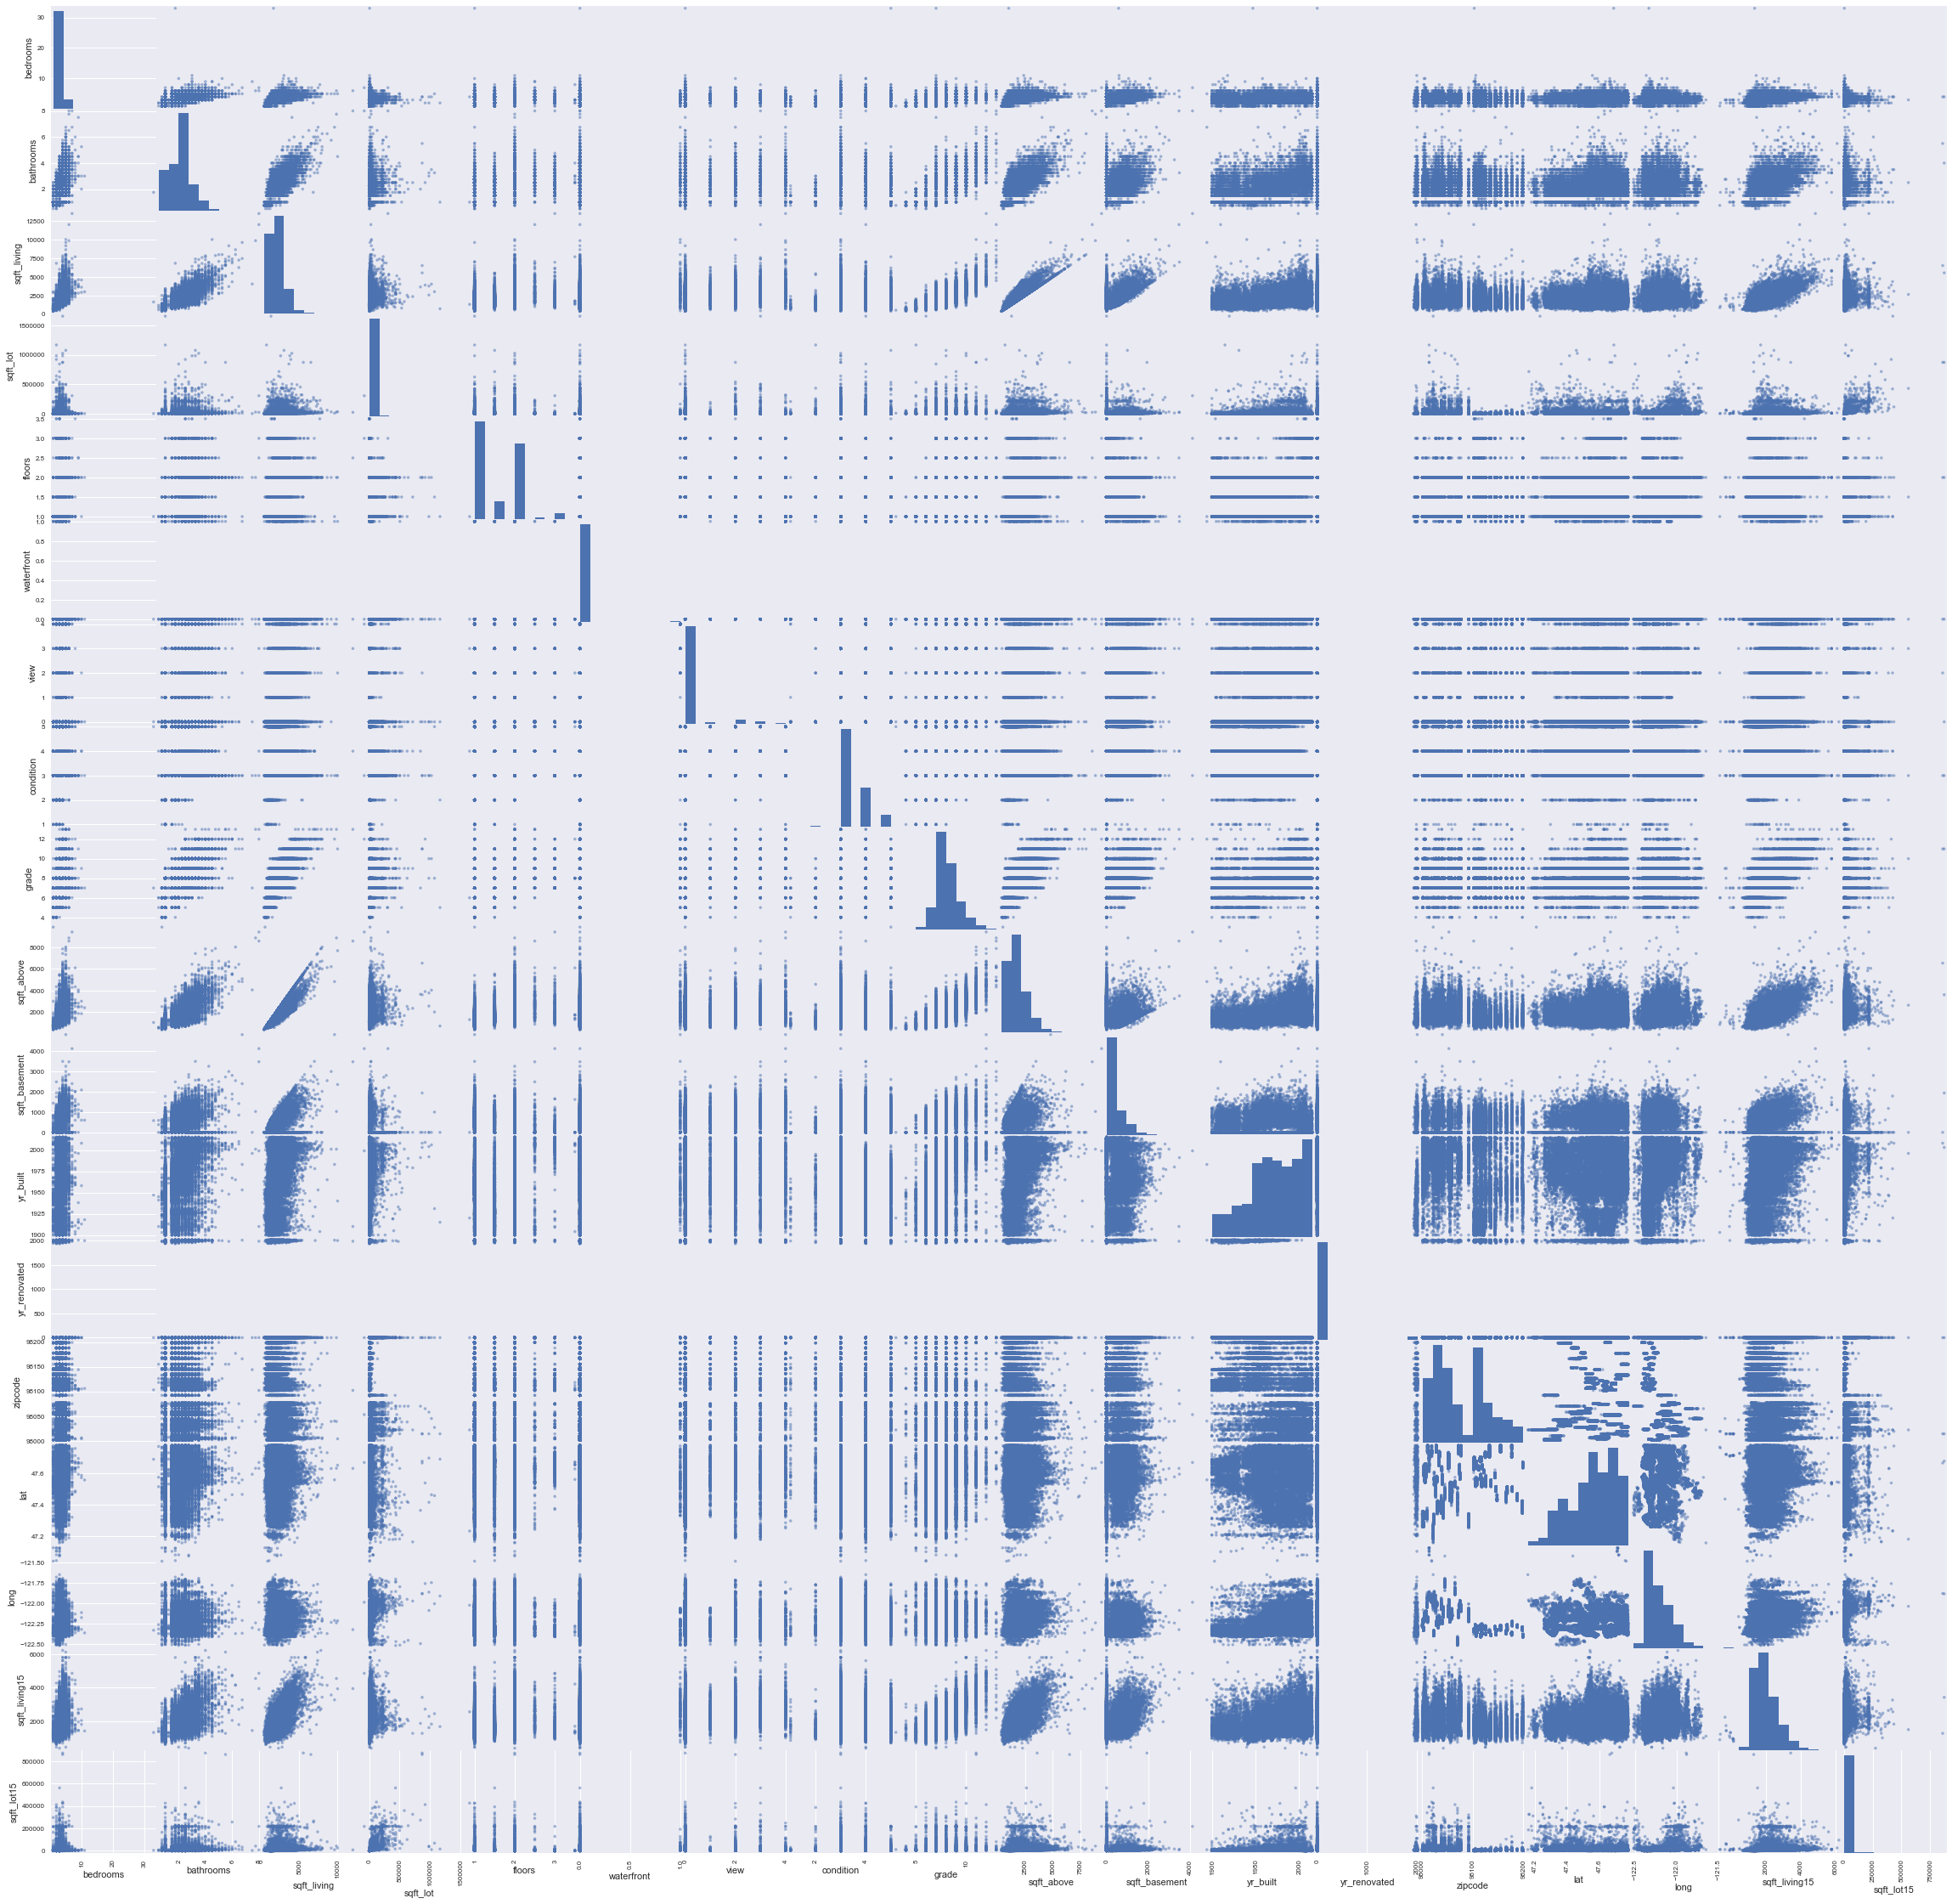

In [10]:
pd.plotting.scatter_matrix(predictors,figsize  = [40, 40]);

too many variables for the scatter plots visualization, lets look at a correlation matrix

In [11]:
predictors.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.513694,0.577696,0.032531,0.178518,-0.001578,0.080379,0.025652,0.356418,0.478967,0.301987,0.156820,0.018345,-0.152539,-0.009939,0.131398,0.391936,0.030779
bathrooms,0.513694,1.000000,0.754793,0.088451,0.503796,0.062055,0.187249,-0.128167,0.665992,0.685959,0.281813,0.508866,0.047738,-0.204016,0.025243,0.224660,0.569396,0.089414
sqft_living,0.577696,0.754793,1.000000,0.173266,0.354260,0.103331,0.283797,-0.061626,0.762719,0.876787,0.433369,0.319584,0.049777,-0.198987,0.053213,0.241473,0.756199,0.184920
sqft_lot,0.032531,0.088451,0.173266,1.000000,-0.007745,0.021216,0.072668,-0.009207,0.113801,0.183653,0.015612,0.052469,0.004297,-0.129626,-0.085076,0.230489,0.143815,0.719499
floors,0.178518,0.503796,0.354260,-0.007745,1.000000,0.019853,0.027748,-0.264259,0.459144,0.523594,-0.245628,0.489898,0.003036,-0.058443,0.049237,0.125360,0.279379,-0.011632
waterfront,-0.001578,0.062055,0.103331,0.021216,0.019853,1.000000,0.380418,0.016293,0.081945,0.070315,0.082796,-0.024358,0.070615,0.028723,-0.011696,-0.036585,0.083676,0.030188
view,0.080379,0.187249,0.283797,0.072668,0.027748,0.380418,1.000000,0.045464,0.250014,0.166907,0.276521,-0.054415,0.088336,0.085300,0.006174,-0.076306,0.280934,0.072797
condition,0.025652,-0.128167,-0.061626,-0.009207,-0.264259,0.016293,0.045464,1.000000,-0.148886,-0.159186,0.170361,-0.361838,-0.056127,0.002616,-0.016021,-0.105805,-0.093556,-0.004386
grade,0.356418,0.665992,0.762719,0.113801,0.459144,0.081945,0.250014,-0.148886,1.000000,0.756289,0.166466,0.448574,0.015494,-0.185138,0.113629,0.199735,0.713176,0.122404
sqft_above,0.478967,0.685959,0.876787,0.183653,0.523594,0.070315,0.166907,-0.159186,0.756289,1.000000,-0.053403,0.425170,0.019099,-0.260751,-0.000014,0.344774,0.730794,0.195983


In [12]:
abs(predictors.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


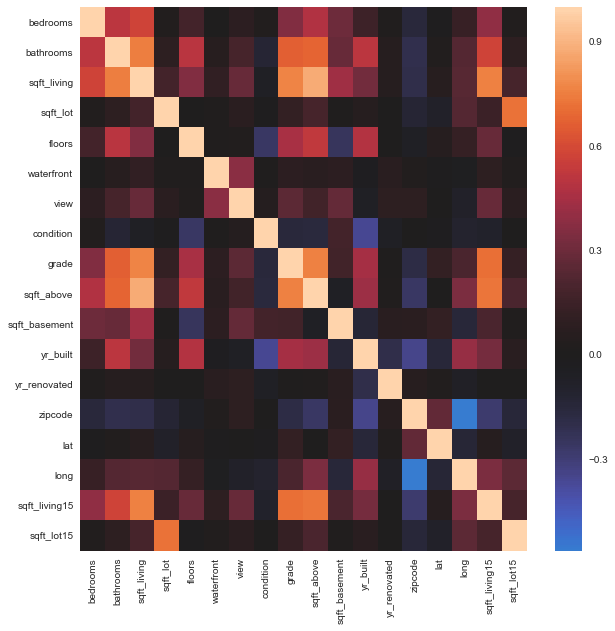

In [18]:
plt.subplots(figsize=(10,10))

sns.heatmap(predictors.corr(), center=0);

the following are highly correlated:<br>
bathrooms<br>
sqft_living<br>
grade<br>
sqft_above<br>
sqft_living15<br>

I will remove all save sqft_living since that appears most often and should be a great proxy for the others